In [15]:
using Cosmology
using Cosmology: integrate
using PyPlot
using JLD2

In [98]:
p = new_params(H0=67., ωb=0.0225, ωc=0.12, mν=0.06eV, Nν_massive=1., Nν_massless=2.046, reltol=1e-3);

   1.5017267272023904E-003   3426.2069422384589       0.67000000000000004     


In [20]:
@self Params gvis(z) = ⅆτ_ⅆz(z) * exp(-τ(z))

gvis (self function of type Params)

In [32]:
integrate(gvis(z))

integrate (self function of type Params)

In [123]:
z = 10 .^ range(5,1,length=128);

In [124]:
rsvis = rs_vis(p);

In [125]:
@self Params ⅆrsvis_ⅆlnH_term1(z) = (exp(-τ(z))-1) * ⅆrs_ⅆz(z)
@self Params ⅆrsvis_ⅆlnH_term2(z) = -gvis(z)*rs(z)
@self Params ⅆrsvis_ⅆlnH_term3(z) = ⅆτ_ⅆz(z) * integrate(z′->gvis(z′)*rs(z′), z, Inf)

@self Params ⅆrsvis_ⅆlnH(z) = ⅆrsvis_ⅆlnH_term1(z) + ⅆrsvis_ⅆlnH_term2(z) + ⅆrsvis_ⅆlnH_term3(z)

ⅆrsvis_ⅆlnH (self function of type Params)

In [126]:
rdeff = rd_vis(p,10Mpc);

In [127]:
@self Params ⅆexprdeffr²_ⅆlnH_term1(z,r) = (1-exp(-τ(z))) * exp(-(rd(z)/r)^2)/r^2 * ⅆrd²_ⅆz(z)
@self Params ⅆexprdeffr²_ⅆlnH_term2(z,r) = -gvis(z)*exp(-(rd(z)/r)^2)
@self Params ⅆexprdeffr²_ⅆlnH_term3(z,r) = ⅆτ_ⅆz(z) * integrate(z′->gvis(z′)*exp(-(rd(z′)/r)^2), z, Inf)

@self Params ⅆexprdeffr²_ⅆlnH(z,r) = ⅆexprdeffr²_ⅆlnH_term1(z,r) + ⅆexprdeffr²_ⅆlnH_term2(z,r) + ⅆexprdeffr²_ⅆlnH_term3(z,r)

ⅆexprdeffr²_ⅆlnH (self function of type Params)

In [177]:
αrs = 1/rsvis;

In [180]:
@time drs = αrs * ⅆrsvis_ⅆlnH.(p,z);

194.746779 seconds (7.15 G allocations: 119.187 GiB, 20.67% gc time)


In [178]:
@time drs′ = αrs * ⅆrsvis_ⅆlnH_term1.(p,z);

  0.175143 seconds (5.56 M allocations: 94.823 MiB, 17.71% gc time)


In [128]:
r₀ = 100Mpc;

In [171]:
αrd = (exp(-(rdeff/r₀)^2) * (-2/r₀^2) * rdeff^2)^-1;

In [173]:
@time drd = αrd * ⅆexprdeffr²_ⅆlnH.(p,z,r₀);

 92.461829 seconds (3.87 G allocations: 64.400 GiB, 20.07% gc time)


In [172]:
@time drd′ = αrd * ⅆexprdeffr²_ⅆlnH_term1.(p,z,r₀);

  0.884975 seconds (36.34 M allocations: 619.530 MiB, 19.73% gc time)


In [186]:
# @save "rs_rd_figure.jld2" p z drs drs′ drd drd′

In [235]:
rc("patch", linewidth=1.5)
to_rgba = plt.matplotlib.colors.to_rgba;

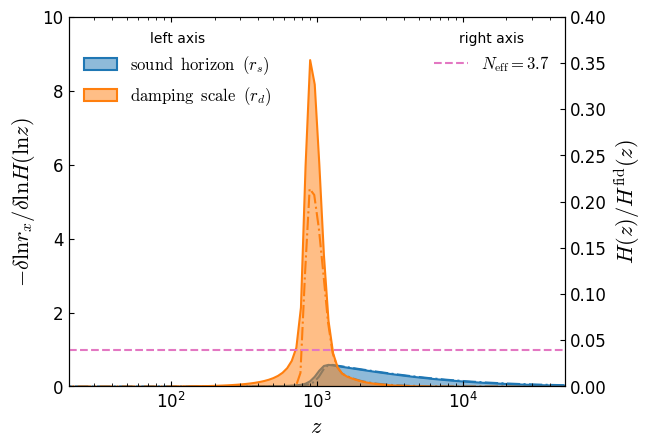

In [260]:
fill_between(z, 0, -z .* drs, edgecolor="C0", facecolor=to_rgba("C0",0.5), label=raw"${\rm sound\;\;horizon} \;\;(r_s)$")
semilogx(z, -z .* drs′, c="C0", ls="-.", zorder=-100)

fill_between(z, 0, -z .* drd, edgecolor="C1", facecolor=to_rgba("C1",0.5), label=raw"${\rm damping\;\;scale} \;\;(r_d)$")
semilogx(z, -z .* drd′, c="C1", ls="-.", zorder=-100)

legend(title="left axis", loc="upper left")

ylim(0,10)
xlim(2e1,5e4)
xlabel(raw"$z$")
ylabel(raw"$-\delta \ln r_x / \delta \ln H(\ln z)$")

twinx()



plot(xlim(), fill(0.04,2), "C6--", label=raw"$N_{\rm eff}=3.7$")
legend(title="right axis", loc="upper right")


ylim(0,0.4)
ylabel(raw"$H(z) / H^{\rm fid}(z)$")

savefig("paper/Figures/rs_rd.pdf", bbox_inches="tight")